<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted! Keep up the good work on the next sprint! :)

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! There are just a couple of tiny problems, that, I'm sure, will be straightforward to fix. Let me know if you have any questions!

# Project description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. We need to predict whether a customer will leave the bank soon. We have the data on clients’ past behavior and termination of contracts with the bank.

Our mission: Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

**Type of problem** Classification

# Data description

**Features**
- **RowNumber** -data string index
- **CustomerId** - unique customer identifier
- **Surname** - surname
- **CreditScore** - credit score
- **Geography** - country of residence
- **Gender** - gender
- **Age** - age
- **Tenure** - period of maturation for a customer’s fixed deposit (years)
- **Balance** - account balance
- **NumOfProducts** - number of banking products used by the customer
- **HasCrCard** - customer has a credit card
- **IsActiveMember** - customer’s activeness
- **EstimatedSalary** - estimated salary

**Target**
- **Exited** - сustomer has left

# import libraries

In [2]:
# update libraries
!pip install pandas - U
!pip install scikit-learn - U

ERROR: Invalid requirement: '-'
ERROR: Invalid requirement: '-'


In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [4]:
# definitions
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# delete error messages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Open the data file and study the general information.

# Read the data

In [6]:
df = pd.read_csv("/datasets/Churn.csv", sep=",")

# Check the data

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


The Data Frame has 10,000 rows and 14 columns. Except column 'Tenure' there is no missing values

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

# Check the data frame for missing values and duplicates

**checking for missing values**

In [9]:
# list of all missing values in the Dataset - in total and %
report = df.isna().sum().to_frame()
report = report.rename(columns={0: "missing_values"})
report["%_of_total"] = (report["missing_values"] / df.shape[0] * 100).round(2)
report.sort_values(by="missing_values", ascending=False)

,missing_values,%_of_total
Tenure,909,9.09
RowNumber,0,0.00
CustomerId,0,0.00
Surname,0,0.00
CreditScore,0,0.00
Geography,0,0.00
Gender,0,0.00
Age,0,0.00
Balance,0,0.00
NumOfProducts,0,0.00


missing data on Tenure

In [10]:
df[df['Tenure'].isna()].head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,"140,469.38",1
48,49,15766205,Yin,550,Germany,Male,38,NaN,"103,391.38",1,0,1,"90,878.13",0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,"146,050.97",2,0,0,"86,424.57",0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,"125,561.97",1,0,0,"164,040.94",1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,"136,857.00",1,0,0,"84,509.57",0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,"26,019.59",0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,"114,675.75",0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,"85,982.47",0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,"6,534.18",0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,"108,055.10",2,1,0,"27,231.26",0


We will replace the NaN with the median of this feature

In [11]:
Tenure_med = round(df['Tenure'].median())
df['Tenure'].fillna(value=Tenure_med, inplace=True)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, that's a reasonable way to deal with missing values

</div>

**Checking for duplicates**

In [12]:
# check to see if there are exact duplicates:
print(f"Number of duplictes is \t\t{df.duplicated().sum()}")

Number of duplictes is 		0


no duplicates on the data

**Removing unnecessary feature columns**

no need for the following columns:

- RowNumber
- CustomerId
- Surname

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


# Encoding

Two features need encoding:

- **Gender** - we will use encoding by map
- **Geography** - we will use One-Hot Encoding (OHE)

**Encoding - Gender**

<AxesSubplot:>

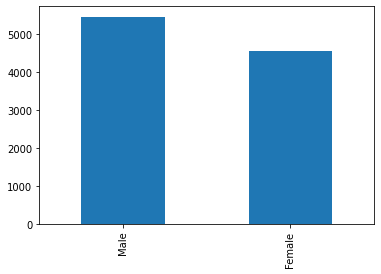

In [14]:
# checking the content of the feature
df['Gender'].value_counts().plot(kind='bar')

In [15]:
# only two option
gender_dict = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_dict)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,1,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,1,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,1,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,1,43,2.00,"125,510.82",1,1,1,"79,084.10",0


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Note that `get_dummies` works with binary features as well :)

</div>

**OHE - Geography**

<AxesSubplot:>

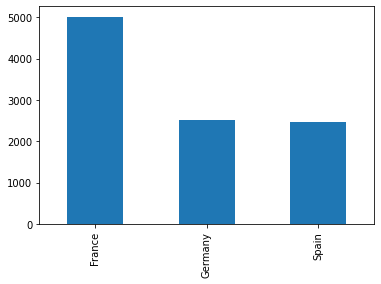

In [16]:
# checking the content of the feature
df['Geography'].value_counts().plot(kind='bar')

In [17]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2.00,0.00,1,1,1,"101,348.88",1,0,0
1,608,1,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1
2,502,1,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0
3,699,1,39,1.00,0.00,2,0,0,"93,826.63",0,0,0
4,850,1,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1


# Split the source data into a training set and a validation set

features are all parameters (input) for the model. The target is the discrete class of the outcome.

**Split the data to training and validation test (3:1:1)**

<div class="alert alert-warning">
<b>Reviewer's comment</b>

> We use 75% for training and 25% for validation
    
That doesn't match the code :)

</div>

In [18]:
# First, we split the data to train and temp
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345)

In [19]:
# Then, we split the temp to test and valid
df_test, df_validate = train_test_split(
    df_temp, test_size=0.5, random_state=12345)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train, validation and test. The proportions are reasonable!

</div>

**Divide the data to feature and target**

In [20]:
# feature
features_train = df_train.drop(['Exited'], axis=1)
features_validate = df_validate.drop(['Exited'], axis=1)
features_test = df_test.drop(['Exited'], axis=1)

In [21]:
# target
target_train = df_train['Exited']
target_validate = df_validate['Exited']
target_test = df_test['Exited']

**Feature Scaling**

In [22]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [23]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [24]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_validate[numeric] = scaler.transform(features_validate[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div class="alert alert-success">
<b>Reviewer's comment</b>

Scaling is applied correctly

</div>

# Checking models

**checking score of DecisionTreeClassifier**

In [25]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=11)
model_dtc.fit(features_train, target_train)
predicted_validate = model_dtc.predict(features_validate)
accuracy_valid = accuracy_score(target_validate, predicted_validate)
accuracy_valid

0.814

**Sanity Check**

Checking the relation between the target outcome 1 and 0

<AxesSubplot:>

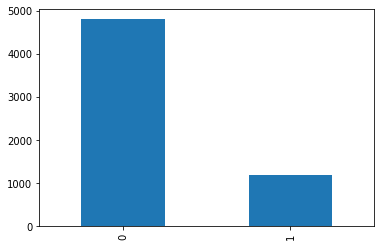

In [26]:
target_train.value_counts().plot(kind='bar')

Most of the target is '0'

In [27]:
target_pred_constant = pd.Series(0 for i in target_train)
accuracy_score(target_train, target_pred_constant)


0.8006666666666666

dummy model that return '0' every time, get a score of 0.8

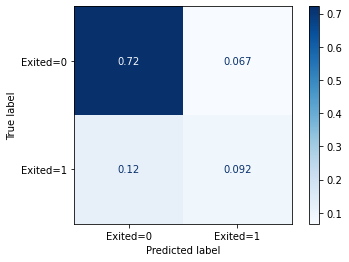

In [28]:
#model_dt = DecisionTreeClassifier(random_state=12345, max_depth=3)
#model_dt.fit(features_train, target_train)
plot_confusion_matrix(estimator=model_dtc, X=features_validate, y_true=target_validate,
                      normalize='all', cmap='Blues', display_labels=['Exited=0', 'Exited=1'])

# Calculating F1

In [29]:
predicted_validate = model_dtc.predict(features_validate)
f1_score(target_validate, predicted_validate)

0.4972972972972973

# Calculating ROC-AUC

In [30]:
probabilities_valid = model_dtc.predict_proba(features_validate)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_validate,probabilities_one_valid)
print(auc_roc)

0.7161389117500236


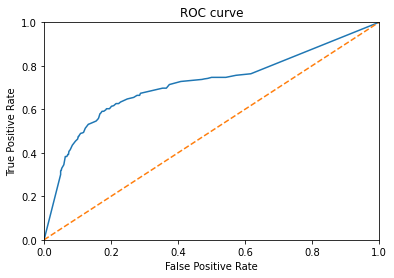

In [31]:
fpr, tpr, thresholds = roc_curve( target_validate, probabilities_one_valid) 

plt.figure()

plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use the functions plt.xlim() and plt.ylim() to
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >

# < add the heading "ROC curve" with the function plt.title() >
plt.title('ROC curve')

plt.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Great, a model was trained without taking the imbalance into account first. Could you please calculate ROC-AUC and plot the ROC curve for this model as well?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Very good!

</div>

# Class imbalance

We are checking the target to find out if the target is balance or not

In [32]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As we can see, the imbalance ratio is almost 1:4 '0' to '1'.

We need to address this imbalance.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep!

</div>

**Altering the model parameters**

In [33]:
model_dtc_bal = DecisionTreeClassifier(
    random_state=12345, max_depth=11, class_weight='balanced')
model_dtc_bal.fit(features_train, target_train)
predicted_validate = model_dtc_bal.predict(features_validate)
f1_score(target_validate, predicted_validate)

0.5159301130524152

Using class weight in the model raise the F1 score

<div class="alert alert-success">
<b>Reviewer's comment</b>

Class weights were applied successfully

</div>

# Adjusting the threshold

In [34]:
model_dtc_bal = DecisionTreeClassifier(
    random_state=12345, max_depth=11, class_weight='balanced')
model_dtc_bal.fit(features_train, target_train)
probabilities_validate = model_dtc_bal.predict_proba(features_validate)
probabilities_one_valid = probabilities_validate[:, 1]

for threshold in np.arange(0, 0.95, 0.04):
    predicted_validate = probabilities_one_valid > threshold
    precision = precision_score(target_validate, predicted_validate)
    recall = recall_score(target_validate, predicted_validate)
    f1 = f1_score(target_validate, predicted_validate)

    print(
        f'Threshold = {threshold:.2f} | Precision = {precision:.3f}, Recall = {recall:.3f}, F1 = {f1:.3f}')

Threshold = 0.00 | Precision = 0.338, Recall = 0.723, F1 = 0.461
Threshold = 0.04 | Precision = 0.338, Recall = 0.723, F1 = 0.461
Threshold = 0.08 | Precision = 0.345, Recall = 0.721, F1 = 0.467
Threshold = 0.12 | Precision = 0.358, Recall = 0.697, F1 = 0.473
Threshold = 0.16 | Precision = 0.381, Recall = 0.683, F1 = 0.489
Threshold = 0.20 | Precision = 0.382, Recall = 0.683, F1 = 0.490
Threshold = 0.24 | Precision = 0.399, Recall = 0.671, F1 = 0.500
Threshold = 0.28 | Precision = 0.408, Recall = 0.662, F1 = 0.505
Threshold = 0.32 | Precision = 0.408, Recall = 0.662, F1 = 0.505
Threshold = 0.36 | Precision = 0.424, Recall = 0.638, F1 = 0.509
Threshold = 0.40 | Precision = 0.427, Recall = 0.629, F1 = 0.509
Threshold = 0.44 | Precision = 0.445, Recall = 0.608, F1 = 0.513
Threshold = 0.48 | Precision = 0.447, Recall = 0.605, F1 = 0.514
Threshold = 0.52 | Precision = 0.456, Recall = 0.593, F1 = 0.516
Threshold = 0.56 | Precision = 0.459, Recall = 0.591, F1 = 0.517
Threshold = 0.60 | Precis

The best F1 score is in threshhold = 0.56

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It's nice that you adjusted the threshold! Threshold = 0.56 has a higher F1 score though :)

</div>

# ROC curve & AUC-ROC

In [35]:
model_dtc_bal = DecisionTreeClassifier(
    random_state=12345, max_depth=11, class_weight='balanced')
model_dtc_bal.fit(features_train, target_train)

probabilities_validate = model_dtc_bal.predict_proba(features_validate)
probabilities_one_validate = probabilities_validate[:, 1]

auc_roc = roc_auc_score(target_validate, probabilities_one_validate)

auc_roc

0.7362177339443627

# graph ROC curve

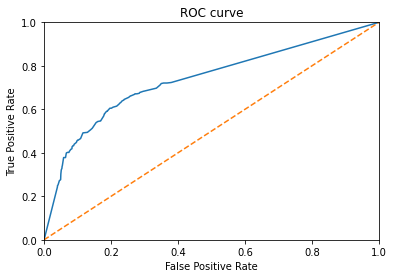

In [36]:
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_validate)

# the graph
plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')

#   set the boundary for the axes from 0 to 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

# name the axes "False Positive Rate" and "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add the heading "ROC curve"
plt.title('ROC curve')

plt.show()

**conclusion:** Our model is not very helpful.

We will try other models and change the hyperparameters.

**imbalance target - Upsampling**

In [37]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [38]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Upsampling function looks good, and it was correctly applied only to the train set. One question: is the `repeat` value 3 the best we can do? Does it produce a balanced dataset?

</div>

In [39]:
model_dtc_bal_us = DecisionTreeClassifier(
    random_state=12345, max_depth=11, class_weight='balanced')
model_dtc_bal_us.fit(features_upsampled, target_upsampled)
predicted_valid = model_dtc_bal_us.predict(features_validate)


print('F1:', f1_score(target_validate, predicted_valid))

F1: 0.5321100917431193




We will replace the feature train with feature upsampled and target train with target upsampled

In [40]:
features_train = features_upsampled
target_train = target_upsampled

# Investigate the quality of different models and changing hyperparameters

# Decision Tree

Decision Tree is one of the predictive modeling approaches used in when the predicted outcome is the class (discrete) to which the data belongs.

It uses a decision tree to go from observations (features) about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

In [41]:
# We will start with max_depth = 3 for fast model and then we will optimize this hyper parameter
model_dtc = DecisionTreeClassifier(
    random_state=12345, max_depth=3, class_weight='balanced')

In [42]:
model_dtc.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=12345)

In [43]:
predicted_validate = model_dtc.predict(features_validate)
f1_score(target_validate, predicted_validate)

0.5129682997118156

conclusion: when running the model on hyperparameter max__depth = 3, the F1 score of the model is 0.513

**optimizing hyperparameters**

We will try to change the hyperparameter max_depth from 1 to 10 to find out what gives the best accuracy score of the model.

In [44]:
for i in range(1, 11):
    model_dt = DecisionTreeClassifier(
        random_state=12345,  max_depth=i, class_weight='balanced')
    model_dt.fit(features_train, target_train)
    predictions_validate = model_dt.predict(features_validate)
    f1_dt = f1_score(target_validate, predictions_validate)
    print(f'For max_depth = {i},\t F1 is {f1_dt:.5f}')

For max_depth = 1,	 F1 is 0.48515
For max_depth = 2,	 F1 is 0.51297
For max_depth = 3,	 F1 is 0.51297
For max_depth = 4,	 F1 is 0.53852
For max_depth = 5,	 F1 is 0.58091
For max_depth = 6,	 F1 is 0.56490
For max_depth = 7,	 F1 is 0.56130
For max_depth = 8,	 F1 is 0.54953
For max_depth = 9,	 F1 is 0.54845
For max_depth = 10,	 F1 is 0.52692


conclusion: on checking the model on the validate data, the best F1 score is max__depth = 5

**F1**

In [45]:
model_dt = DecisionTreeClassifier(
    random_state=12345, max_depth=5, class_weight='balanced')
model_dt.fit(features_train, target_train)
predictions_validate = model_dt.predict(features_validate)
f1_dt = f1_score(target_validate, predictions_validate)
print(f'For max_depth = 5 on validation data, F1 is {f1_dt:.5f}')

For max_depth = 5 on validation data, F1 is 0.58091


**AUC-ROC**

In [46]:
probabilities_validate = model_dt.predict_proba(features_validate)
probabilities_one_validate = probabilities_validate[:, 1]

auc_roc = roc_auc_score(target_validate, probabilities_one_validate)

auc_roc

0.8355347481752318

ROC curve

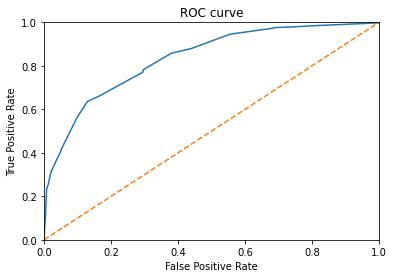

In [47]:
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_validate)

# the graph
plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')

#   set the boundary for the axes from 0 to 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

# name the axes "False Positive Rate" and "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add the heading "ROC curve"
plt.title('ROC curve')

plt.show()

# Random Forest

Random forests are an ensemble learning method for classification that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees.

Random decision forests correct for decision trees' habit of overfitting to their training set. 

Random forests generally outperform decision trees.

In [48]:
# We will start with n_estimators = 10 for fast model and then we will optimize this hyper parameter
model_rfc = RandomForestClassifier(
    random_state=12345, n_estimators=10, class_weight='balanced')

In [49]:
model_rfc.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=12345)

In [50]:
predicted_validate = model_rfc.predict(features_validate)
f1_score(target_validate, predicted_validate)

0.5788751714677641

**optimizing hyperparameters**

We will try to change the hyperparameter n_estimators from 1 to 10 to find out what gives the best accuracy score of the model.

In [51]:
list_f1 = []
for i in range(1, 101):
    model_rf = RandomForestClassifier(
        random_state=12345, n_estimators=i, class_weight='balanced')
    model_rf.fit(features_train, target_train)
    predictions_validate = model_rf.predict(features_validate)
    f1_rf = f1_score(target_validate, predictions_validate)
    list_f1.append(f1_rf)
    print(f'For n_estimators = {i},\t F1 is {f1_rf:.5f}')

For n_estimators = 1,	 F1 is 0.45312
For n_estimators = 2,	 F1 is 0.42988
For n_estimators = 3,	 F1 is 0.52297
For n_estimators = 4,	 F1 is 0.48580
For n_estimators = 5,	 F1 is 0.53885
For n_estimators = 6,	 F1 is 0.53835
For n_estimators = 7,	 F1 is 0.55412
For n_estimators = 8,	 F1 is 0.55878
For n_estimators = 9,	 F1 is 0.57436
For n_estimators = 10,	 F1 is 0.57888
For n_estimators = 11,	 F1 is 0.57253
For n_estimators = 12,	 F1 is 0.55586
For n_estimators = 13,	 F1 is 0.56662
For n_estimators = 14,	 F1 is 0.55510
For n_estimators = 15,	 F1 is 0.58366
For n_estimators = 16,	 F1 is 0.56599
For n_estimators = 17,	 F1 is 0.56921
For n_estimators = 18,	 F1 is 0.57066
For n_estimators = 19,	 F1 is 0.58149
For n_estimators = 20,	 F1 is 0.57337
For n_estimators = 21,	 F1 is 0.57256
For n_estimators = 22,	 F1 is 0.57259
For n_estimators = 23,	 F1 is 0.58311
For n_estimators = 24,	 F1 is 0.57412
For n_estimators = 25,	 F1 is 0.57480
For n_estimators = 26,	 F1 is 0.56599
For n_estimators = 27

In [52]:
print(f'The max value of F1 score is {max(list_f1):.4f}')

The max value of F1 score is 0.5914


In [53]:
print(
    f'The max F1 score is when n_estimators is {list_f1.index(max(list_f1))+1}')

The max F1 score is when n_estimators is 70


conclusion: on checking the model on the validate data, the best F1 score is n__estimators = 70

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This is accuracy, not F1 score

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!
    

</div>

**AUC-ROC**

In [55]:
probabilities_validate = model_rf.predict_proba(features_validate)
probabilities_one_validate = probabilities_validate[:, 1]

auc_roc = roc_auc_score(target_validate, probabilities_one_validate)

auc_roc

0.8440458362003445

ROC curve

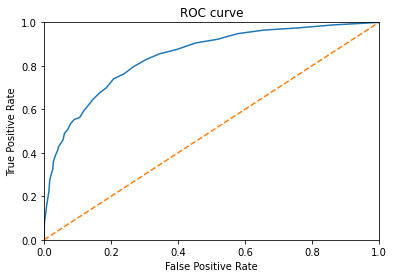

In [56]:
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_validate)

# the graph
plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')

#   set the boundary for the axes from 0 to 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

# name the axes "False Positive Rate" and "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add the heading "ROC curve"
plt.title('ROC curve')

plt.show()

# Logistic Regression

Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable

Logistic regression is estimating the parameters of a logistic model (a form of binary regression).

Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable (target) where the two values are labeled "0" and "1".

In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value).

The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling.

The function that converts log-odds to probability is the sigmoid function.

In a binary logistic regression model, the dependent variable (target) has two levels (categorical).

In [57]:
model_lrc = LogisticRegression(
    random_state=12345, solver='liblinear', max_iter=100, class_weight='balanced')

In [58]:
model_lrc.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [59]:
predicted_validate = model_lrc.predict(features_validate)
f1_score(target_validate, predicted_validate)

0.4775086505190312

conclusion: when running the model on hyperparameter max__iter = 100 , the F1 score of the model is 0.4775

**optimizing hyperparameters**

We will try to change the hyperparameter solver for every option to find out what gives the best accuracy score of the model.

In [60]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    model_lr = LogisticRegression(
        random_state=12345, solver=i, class_weight='balanced')
    model_lr.fit(features_train, target_train)
    predictions_validate = model_lr.predict(features_validate)
    f1_lr = f1_score(target_validate, predictions_validate)
    print(f'For solver = {i},\t F1 is {f1_lr:.5f}')

For solver = newton-cg,	 F1 is 0.47751
For solver = lbfgs,	 F1 is 0.47751
For solver = liblinear,	 F1 is 0.47751
For solver = sag,	 F1 is 0.47751
For solver = saga,	 F1 is 0.47751


In [61]:
for i in range(1, 1000, 100):
    model_lr = LogisticRegression(
        random_state=12345, solver='liblinear', max_iter=i, C=1, class_weight='balanced')
    model_lr.fit(features_train, target_train)
    predictions_validate = model_lr.predict(features_validate)

    f1_lr = f1_score(target_validate, predictions_validate)
    print(f'For max_iter = {i},\t F1 is {f1_lr:.5f}')

For max_iter = 1,	 F1 is 0.47619
For max_iter = 101,	 F1 is 0.47751
For max_iter = 201,	 F1 is 0.47751
For max_iter = 301,	 F1 is 0.47751
For max_iter = 401,	 F1 is 0.47751
For max_iter = 501,	 F1 is 0.47751
For max_iter = 601,	 F1 is 0.47751
For max_iter = 701,	 F1 is 0.47751
For max_iter = 801,	 F1 is 0.47751
For max_iter = 901,	 F1 is 0.47751


**conclusion:**

- on checking the max_iter on the validate data, there is no change in F1 after the hyperparameter is above 10
- on checking the model on the validate data, all the solvers got the same F1 score

**F1**

In [62]:
model_lr = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_validate = model_lr.predict(features_validate)
f1_lr = f1_score(target_validate, predictions_validate)
print(f'For solver = "liblinear",\t F1 is {f1_lr:.5f}')

For solver = "liblinear",	 F1 is 0.47751


**AUC-ROC**

In [63]:
probabilities_validate = model_lr.predict_proba(features_validate)
probabilities_one_validate = probabilities_validate[:, 1]

auc_roc = roc_auc_score(target_validate, probabilities_one_validate)

auc_roc

0.741771115818256

**ROC curve**

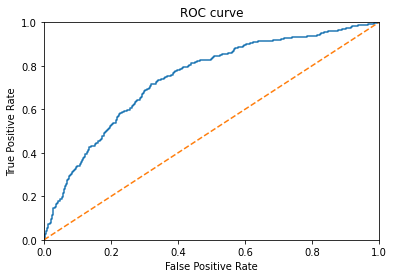

In [64]:
fpr, tpr, thresholds = roc_curve(target_validate, probabilities_one_validate)

# the graph
plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')

#   set the boundary for the axes from 0 to 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

# name the axes "False Positive Rate" and "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add the heading "ROC curve"
plt.title('ROC curve')

plt.show()

# Conclusion

This project is about training classification model. We have 2 options on the target: '0' and '1'. For selecting the best model, we checked three options: decision tree, random forest and Logistic Regression. To prepare the date, we checked it for duplicates and missing values

We split the data between train data and validate data with the ratio 25%. For every split we had feature data for the independent variables and target for the outcome. after running the model, we tried to optimize it by changing one hyperparameter and to find out what setting returns the best accurate score.

##### **The major finding**
- The decision tree model
    - hyperparameter: max_depth. best value = 5
    - F1 score on test data: 0.58091
    - auc_roc: 0.8355
- The random forest model
    - hyperparameter: n_estimators. best value = 70
    - F1 score on test data: 0.5914
    - auc_roc: 0.8440
- The logistic regression model
    - hyperparameter: solver. best value = liblinear
    -F1 score on test data: 0.4775
    -auc_roc: 0.7417

The **random forest model** wins



<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a couple of different models and balancing techniques and did some hyperparameter tuning!

</div>

# Test data

**running the models on test data**

# Random forest

#  F1 score of the test data

In [75]:
model_rf = RandomForestClassifier(
    random_state=12345, n_estimators=70, class_weight='balanced')
model_rf.fit(features_train, target_train)
predictions_test = model_rf.predict(features_test)
f1_rf = f1_score(target_test, predictions_test)
print(f'For n_estimators = 70 on the test data, F1 is {f1_rf:.5f}')

For n_estimators = 70 on the test data, F1 is 0.60434


# AUC - ROC test data

In [78]:
probabilities_test = model_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

auc_roc

0.8374914559125085

# Decision Tree

In [76]:
model_dt = DecisionTreeClassifier(
    random_state=12345, max_depth=5, class_weight='balanced')
model_dt.fit(features_train, target_train)
predictions_test = model_dt.predict(features_test)
f1_dt = f1_score(target_test, predictions_test)
print(f'For max_depth = 5 on validation data, F1 is {f1_dt:.5f}')

For max_depth = 5 on validation data, F1 is 0.59638


# AUC - ROC test data

In [77]:
probabilities_test = model_dt.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

auc_roc

0.8310244134068074

# Logistic Regression

In [79]:
model_lr = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_test = model_lr.predict(features_test)
f1_lr = f1_score(target_test, predictions_test)
print(f'For solver = "liblinear",\t F1 is {f1_lr:.5f}')

For solver = "liblinear",	 F1 is 0.48885


# AUC - ROC test data

In [84]:
probabilities_test = model_lr.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

auc_roc

0.7636387832009629

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This is also accuracy, not F1 score

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright, now I can see both F1 score and ROC-AUC

</div>

# Confusion matrix

**dummy classifier**

compare the models to the dummy classifier by the confusion matrix

In [67]:
# making the dummy classifier
clf_dummy = DummyClassifier(random_state=12345)
clf_dummy.fit(features_train, target_train)
predictions_test = clf_dummy.predict(features_test)

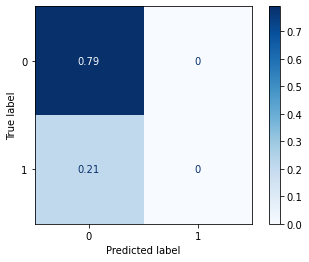

In [68]:
# for the test data
plot_confusion_matrix(estimator=clf_dummy, X=predictions_test,
                      y_true=target_test, cmap='Blues', normalize='all')

calculate the value_counts of the data to see the unbalanced data

In [69]:
target_test.value_counts(normalize=True)

0   0.79
1   0.21
Name: Exited, dtype: float64

<AxesSubplot:>

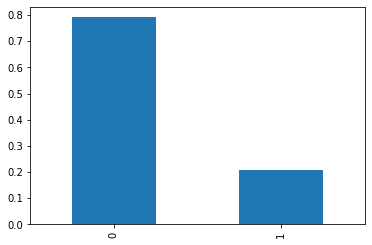

In [70]:
target_test.value_counts(normalize=True).plot(kind='bar')

**conclusion:** the test data is not balanced. The dummy classifier gives about 20% accuracy only because of the imbalance target data.

# ploting confusion matrix to the three models

**Decision Tree confusion matrix** 

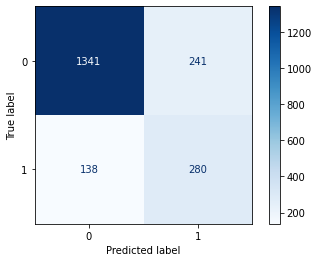

In [71]:
plot_confusion_matrix(estimator=model_dt, X=features_test,
                      y_true=target_test, cmap='Blues')

**Random Forest confusion matrix**

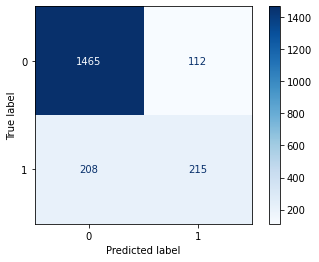

In [72]:
plot_confusion_matrix(estimator=model_rf, X=features_validate,
                      y_true=target_validate, cmap='Blues')

**Logistic Regression confusion matrix**

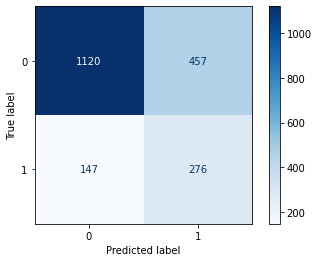

In [73]:
plot_confusion_matrix(estimator=model_lr, X=features_validate,
                      y_true=target_validate, cmap='Blues')

# The major finding

- The decision tree model
    - hyperparameter: max_depth. best value =5
    - F1 score on test data: 0.5963
    - auc_roc: 0.8310
- The random forest model
    - hyperparameter: n_estimators. best value = 70
    - F1 score on test data: 0.60434
    - auc_roc: 0.8374
-The logistic regression model
    - hyperparameter: solver. best value = liblinear
    - F1 score on test data: 0.48885
    - auc_roc: 0.7636

The **random forest model** wins!

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

I couldn't find where the test set metrics were calculated for the decision tree and logistic regression 🤔

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent!

</div>